Import Packages
---

In [19]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Load Data
---

In [20]:
data = pd.read_csv('new_data.csv', usecols=[2])
data = data.set_index(pd.date_range('1959','1989', freq='M'))
data.head(2)

,precipitation
1959-01-31,0.57
1959-02-28,0.56


SPI Function (self-defined)
---

In [77]:
#Standardized Precipitation Index Formula
def spi(ds, thresh):
    #Rolling Mean / Moving Averages
    ds_ma = ds.rolling(thresh, center=False).mean()
    
    #Natural log of moving averages
    ds_In = np.log(ds_ma)
    ds_In[np.isinf(ds_In) == True] = np.nan  #Change infinity to NaN
    
    #Overall Mean of Moving Averages
    ds_mu = np.nanmean(ds_ma)
    
    #Summation of Natural log of moving averages
    ds_sum = np.nansum(ds_In)
        
    #Computing essentials for gamma distribution
    n = len(ds_In[thresh-1:])                  #size of data
    A = np.log(ds_mu) - (ds_sum/n)             #Computing A
    alpha = (1/(4*A))*(1+(1+((4*A)/3))**0.5)   #Computing alpha  ()
    beta = ds_mu/alpha                         #Computing beta (scale)
    
    #Gamma Distribution (CDF)
    gamma = st.gamma.cdf(ds_ma, a=alpha, scale=beta)  
    
    #Standardized Precipitation Index   (Inverse of CDF)
    norm_spi = st.norm.ppf(gamma, loc=0, scale=1)  #loc is mean and scale is standard dev.
    
    return ds_ma, ds_In, ds_mu, ds_sum, n, A, alpha, beta, gamma, norm_spi

Perform SPI computation on Data at Varying Times
---

In [106]:
times = [3, 6, 9, 12, 24]
for i in times:
    x = spi(data['precipitation'], i)
    data['spi_'+str(i)] = x[9]

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Visualization of SPI
---

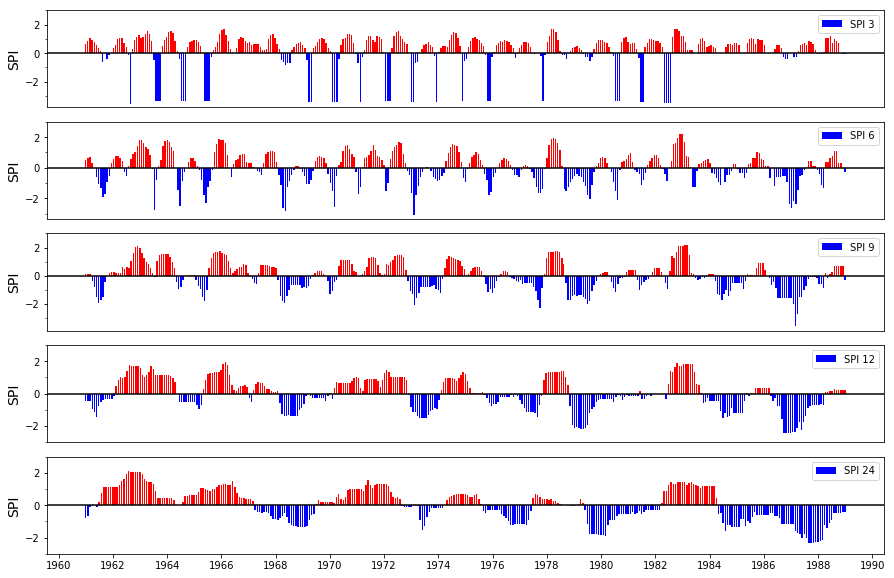

In [145]:
fig, axes = plt.subplots(nrows=5, figsize=(15, 10))
plt.subplots_adjust(hspace=0.15)
for i, ax in enumerate(axes):
    col_scheme=np.where(data['spi_'+str(times[i])]>0, 'r','b')

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.bar(data.index, data['spi_'+str(times[i])], width=25, align='center', color=col_scheme, label='SPI '+str(times[i]))
    ax.axhline(y=0, color='k')
    ax.xaxis.set_major_locator(mdates.YearLocator(2))
    ax.legend(loc='upper right')
    ax.set_yticks(range(-3,4), range(-3,4))
    ax.set_ylabel('SPI', fontsize=14)
    
    if i<len(times)-1:
        ax.set_xticks([],[])

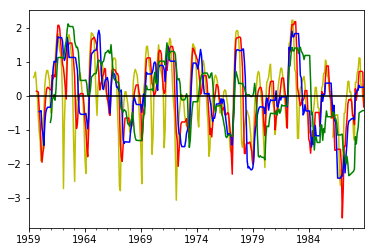

In [105]:
#data['spi_3'].plot(color='k')
data['spi_7'].plot(color='y')
data['spi_9'].plot(color='r')
data['spi_12'].plot(color='b')
data['spi_24'].plot(color='g')
plt.axhline(y=0, color='k')